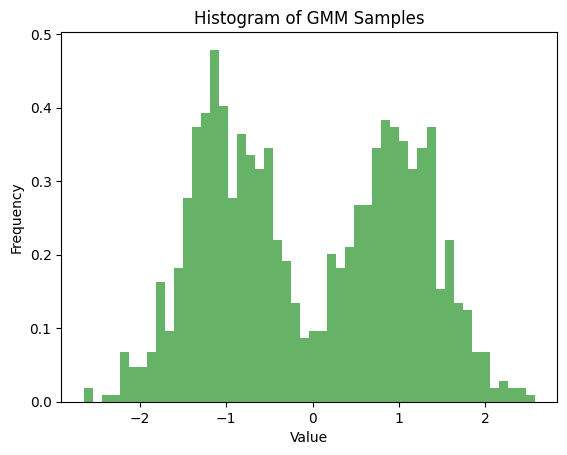

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GMM:
    def __init__(self, lambda_, mu, sigma):
        self.lambda_ = lambda_
        self.mu = mu
        self.sigma = sigma

def GMMsample(gmm, n, b):
    U = np.random.uniform(0, 1, n)

    X = np.zeros(n)

    for i in range(n):
        if U[i] < gmm.lambda_:
            X[i] = np.random.normal(gmm.mu[0], gmm.sigma[0])
        else:
            X[i] = np.random.normal(gmm.mu[1], gmm.sigma[1])

    plt.hist(X, bins=b, density=True, alpha=0.6, color='g')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of GMM Samples')

    plt.show()

    return X

gmm = GMM(lambda_=0.5, mu=[1, -1], sigma=[0.5, 0.5])

X = GMMsample(gmm, n=1000, b=50)


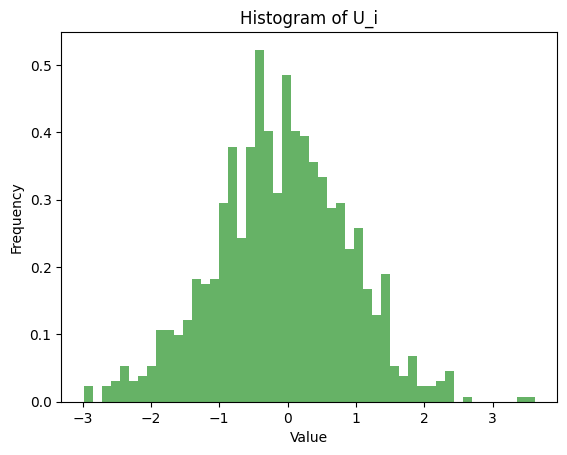

In [3]:
from scipy.stats import norm

def GMMcdf(x, gmm):
    cdf = gmm.lambda_ * norm.cdf(x, gmm.mu[0], gmm.sigma[0]) + (1 - gmm.lambda_) * norm.cdf(x, gmm.mu[1], gmm.sigma[1])
    return cdf

def GMMinv(X, gmm, b):
    F_X = np.array([GMMcdf(x, gmm) for x in X])

    U = norm.ppf(F_X)

    plt.hist(U, bins=b, density=True, alpha=0.6, color='g')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of U_i')

    plt.show()

    return U

gmm = GMM(lambda_=0.5, mu=[1, -1], sigma=[0.5, 0.5])

n = 1000
b = 50

U = GMMinv(X, gmm, b)

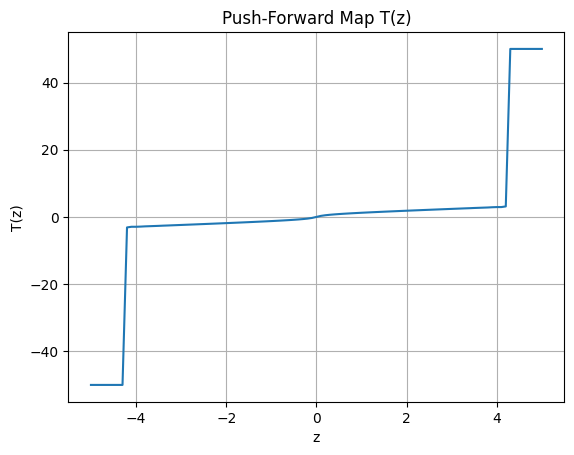

In [4]:
def BinarySearch(F, u, lb=-100, ub=100, maxiter=100, tol=1e-5):
    while F(lb) > u:
        ub = lb
        lb *= 2
    while F(ub) < u:
        lb = ub
        ub *= 2

    for _ in range(maxiter):
        x = (lb + ub) / 2
        t = F(x)
        if t > u:
            ub = x
        else:
            lb = x
        if abs(t - u) <= tol:
            break

    return x

def T(z, gmm):
    Phi_z = norm.cdf(z)
    F_inv = lambda u: BinarySearch(lambda x: GMMcdf(x, gmm), u)
    return F_inv(Phi_z)

gmm = GMM(lambda_=0.5, mu=[1, -1], sigma=[0.5, 0.5])

z_values = np.arange(-5, 5.1, 0.1)
T_values = [T(z, gmm) for z in z_values]

plt.plot(z_values, T_values)
plt.xlabel('z')
plt.ylabel('T(z)')
plt.title('Push-Forward Map T(z)')
plt.grid(True)
plt.show()

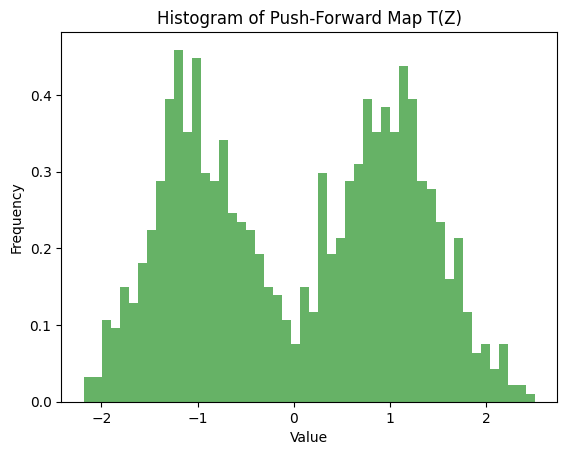

In [5]:
def PushForward(Z, gmm):
    return np.array([T(z, gmm) for z in Z])

gmm = GMM(lambda_=0.5, mu=[1, -1], sigma=[0.5, 0.5])

n = 1000
Z = np.random.normal(0, 1, n)

X = PushForward(Z, gmm)

b = 50
plt.hist(X, bins=b, density=True, alpha=0.6, color='g')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Push-Forward Map T(Z)')

plt.show()

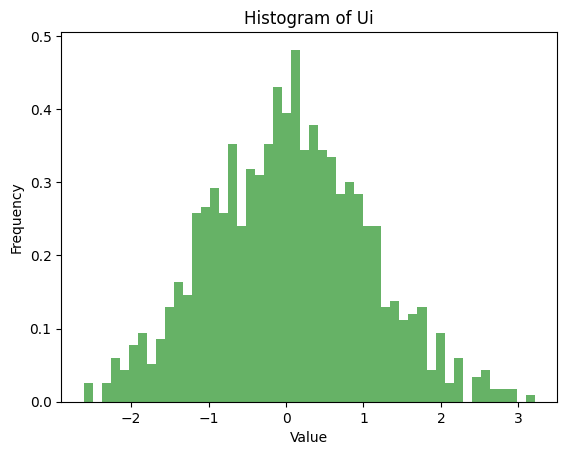

In [6]:
# Compute Ui = Φ^(-1)(F(Xi))
F_X = np.array([GMMcdf(x, gmm) for x in X])
U = norm.ppf(F_X)

b = 50
plt.hist(U, bins=b, density=True, alpha=0.6, color='g')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Ui')

plt.show()